#### 諸々の動作確認用

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from keras.models import load_model
from keras.preprocessing.image import load_img
from tqdm import tqdm

sys.path.append('..')
from src import Utils

loadpkl = Utils.loadpkl
predict_result = Utils.predict_result
IMG_SIZE_TARGET = Utils.IMG_SIZE_TARGET
my_iou_metric = Utils.my_iou_metric

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_df = loadpkl('../output/train_df.pkl')
test_df = loadpkl('../output/test_df.pkl')

In [3]:
train_df.head()

,z,images,masks,coverage,coverage_class
id,,,,,
575d24d81d,843,"[[0.525490196078, 0.513725490196, 0.5254901960...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000000,0
a266a2a9df,794,"[[0.341176470588, 0.376470588235, 0.3333333333...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.504950,6
75efad62c1,468,"[[0.56862745098, 0.466666666667, 0.32549019607...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.993334,10
34e51dba6a,727,"[[0.541176470588, 0.474509803922, 0.3960784313...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.149201,2
4875705fb0,797,"[[0.0666666666667, 0.078431372549, 0.090196078...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.042839,1


In [4]:
test_df.head()

,z
id,
353e010b7b,264
5439dbbddf,557
71bab9f311,846
52551f7a80,610
512d8d9997,577


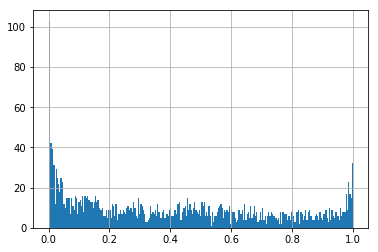

In [5]:
train_df.coverage[train_df.coverage>0.0].hist(bins=255)

In [6]:
x_test = np.array([(np.array(load_img("../input/test/images/{}.png".format(idx), color_mode = "grayscale"))) / 255 for idx in tqdm(test_df.index)]).reshape(-1, IMG_SIZE_TARGET, IMG_SIZE_TARGET, 1)

100%|██████████| 18000/18000 [00:07<00:00, 2312.73it/s]


In [7]:
model = load_model('../output/unet_best0.model', custom_objects={'my_iou_metric': my_iou_metric})

In [8]:
preds_test = predict_result(model, x_test ,IMG_SIZE_TARGET)

In [10]:
preds_test.shape

(18000, 101, 101)

In [11]:
IMG_SIZE_TARGET

101

In [12]:
x_test.shape

(18000, 101, 101, 1)

In [16]:
np.zeros((x_test.shape[0], x_test.shape[1], x_test.shape[2])).shape

(18000, 101, 101)